In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import confusion_matrix as cm

In [3]:
tablet = pd.read_csv("tablet.xls")
tablet.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [4]:
df = tablet.copy()
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [5]:
df.shape

(2000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [8]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [9]:
df.corr()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


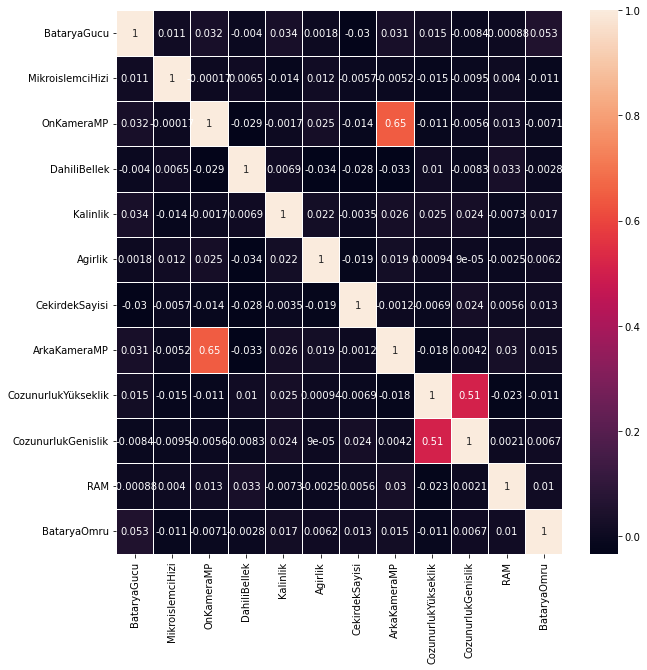

In [10]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,ax = ax, xticklabels=True, yticklabels=True);

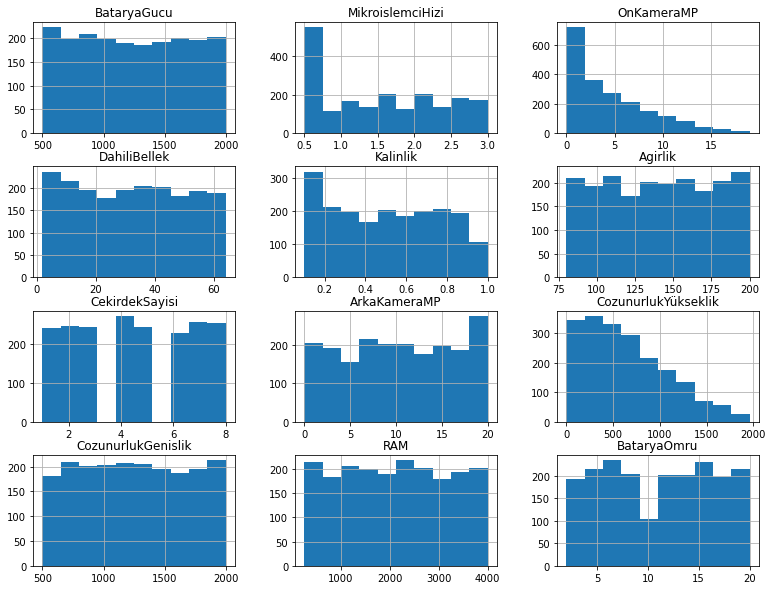

In [11]:
df.hist(figsize=(13,10))
plt.show()

**Hedef değişkenimiz FiyatAralıgı'nın değişkenlerle arasındaki ilişkiye bakıyorum.**

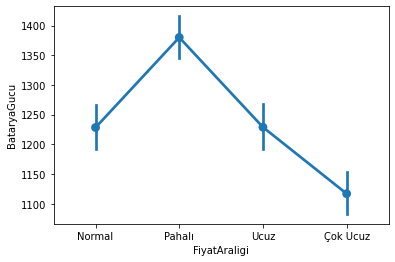

In [12]:
sns.pointplot(x="FiyatAraligi",y="BataryaGucu",data=df);

* Bataryanın güçlü olması ürünün pahalı olması olarak nitelendirilebilir. Batarya gücü önemli bir değişken

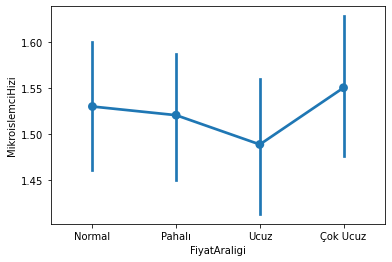

In [13]:
sns.pointplot(x="FiyatAraligi",y="MikroislemciHizi",data=df);

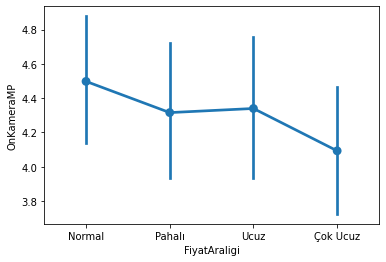

In [14]:
sns.pointplot(x="FiyatAraligi",y="OnKameraMP",data=df);

* Ön kameranın megapikseli belirleyici bir fark değil.

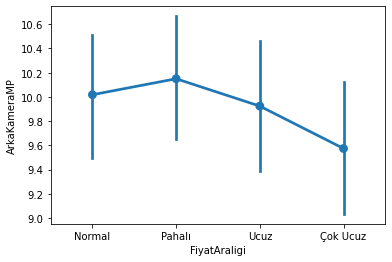

In [15]:
sns.pointplot(x="FiyatAraligi",y="ArkaKameraMP",data=df);

* Arka kameranın pikseli direkt fiyata etki ediyor

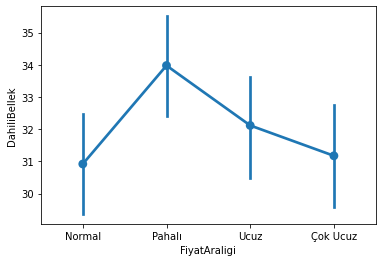

In [16]:
sns.pointplot(x="FiyatAraligi",y="DahiliBellek",data=df);

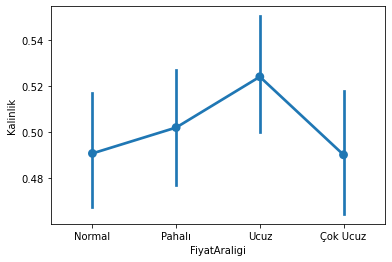

In [17]:
sns.pointplot(x="FiyatAraligi",y="Kalinlik",data=df);

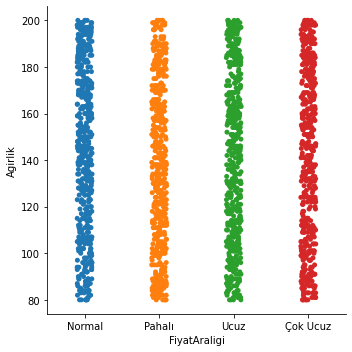

In [18]:
sns.catplot(x="FiyatAraligi",y="Agirlik",data=df);

* Ağırlık fiyat aralfını çokta etkileyen bir faktör değil.

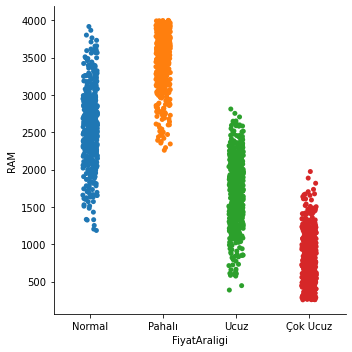

In [19]:
sns.catplot(x="FiyatAraligi",y="RAM",data=df);

* Ram direkt ürün fiyatına etki ediyor.

**Hedef değişkenim ne kadar dengeli ona bakıcam**

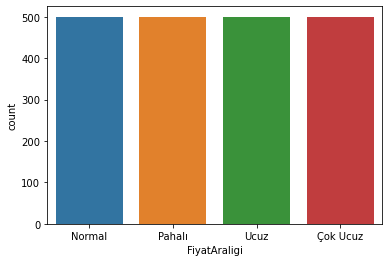

In [20]:
sns.countplot(x="FiyatAraligi",data=df);

* Dengeli oldugunu gördüm. Bu rahat yorumlayabilmem için gayet iyi

* Kategorik 8 özniteliğin benzersiz değerlerinden nominal(sıralanamaz) mi ordinal(sıralanabilir) mi olduguna bakıcam

In [21]:
df["Bluetooth"].unique() # Nominal

array(['Yok', 'Var'], dtype=object)

In [22]:
df["CiftHat"].unique() # Nominal

array(['Yok', 'Var'], dtype=object)

In [23]:
df["4G"].unique() # Nominal

array(['Yok', 'Var'], dtype=object)

In [24]:
df["3G"].unique() # Nominal

array(['Var', 'Yok'], dtype=object)

In [25]:
df["Dokunmatik"].unique() # Nominal

array(['Yok', 'Var'], dtype=object)

In [26]:
df["WiFi"].unique() # Nominal

array(['Yok', 'Var'], dtype=object)

In [27]:
df["FiyatAraligi"].unique() # Ordinal

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [28]:
df["Renk"].unique() # Nominal

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [29]:
df["Renk"] = pd.Categorical(df["Renk"])
df_dummies= pd.get_dummies(df["Renk"], prefix = "Enc_")
df_dummies

,Enc__Beyaz,Enc__Gri,Enc__Kahverengi,Enc__Kırmızı,Enc__Mavi,Enc__Mor,Enc__Pembe,Enc__Sarı,Enc__Siyah,Enc__Turkuaz,Enc__Turuncu,Enc__Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
df = pd.concat([df,df_dummies],axis=1)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Enc__Kahverengi,Enc__Kırmızı,Enc__Mavi,Enc__Mor,Enc__Pembe,Enc__Sarı,Enc__Siyah,Enc__Turkuaz,Enc__Turuncu,Enc__Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   BataryaGucu          2000 non-null   int64   
 1   Bluetooth            2000 non-null   object  
 2   MikroislemciHizi     2000 non-null   float64 
 3   CiftHat              2000 non-null   object  
 4   OnKameraMP           1995 non-null   float64 
 5   4G                   2000 non-null   object  
 6   DahiliBellek         2000 non-null   int64   
 7   Kalinlik             2000 non-null   float64 
 8   Agirlik              2000 non-null   int64   
 9   CekirdekSayisi       2000 non-null   int64   
 10  ArkaKameraMP         2000 non-null   int64   
 11  CozunurlukYükseklik  2000 non-null   int64   
 12  CozunurlukGenislik   2000 non-null   int64   
 13  RAM                  1988 non-null   float64 
 14  BataryaOmru          2000 non-null   int64   
 15  3G                   

In [32]:
df = df.drop("Renk",axis = 1)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Enc__Kahverengi,Enc__Kırmızı,Enc__Mavi,Enc__Mor,Enc__Pembe,Enc__Sarı,Enc__Siyah,Enc__Turkuaz,Enc__Turuncu,Enc__Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [34]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Enc__Beyaz',
       'Enc__Gri', 'Enc__Kahverengi', 'Enc__Kırmızı', 'Enc__Mavi', 'Enc__Mor',
       'Enc__Pembe', 'Enc__Sarı', 'Enc__Siyah', 'Enc__Turkuaz', 'Enc__Turuncu',
       'Enc__Yeşil'],
      dtype='object')

In [35]:
label_encoder = preprocessing.LabelEncoder()

In [36]:
df["Bluetooth_Enc"] = label_encoder.fit_transform(df["Bluetooth"])
df["CiftHat_Enc"] = label_encoder.fit_transform(df["CiftHat"])
df["4G_Enc"] = label_encoder.fit_transform(df["4G"])
df["3G_Enc"] = label_encoder.fit_transform(df["3G"])
df["Dokunmatik_Enc"] = label_encoder.fit_transform(df["Dokunmatik"])
df["WiFi_Enc"] = label_encoder.fit_transform(df["WiFi"])

df = df.drop(["Bluetooth","CiftHat","4G","3G","Dokunmatik","WiFi"],axis=1)
df.head()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Enc__Siyah,Enc__Turkuaz,Enc__Turuncu,Enc__Yeşil,Bluetooth_Enc,CiftHat_Enc,4G_Enc,3G_Enc,Dokunmatik_Enc,WiFi_Enc
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,...,0,0,0,0,1,1,1,0,1,1
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,...,0,0,0,0,0,0,0,0,0,0
2,843,1.3,1.0,16,0.9,119,7,4,593,732,...,0,0,0,0,1,0,1,1,1,0
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,...,0,0,1,0,1,0,0,0,1,0
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,...,0,0,0,0,1,1,1,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   MikroislemciHizi     2000 non-null   float64
 2   OnKameraMP           1995 non-null   float64
 3   DahiliBellek         2000 non-null   int64  
 4   Kalinlik             2000 non-null   float64
 5   Agirlik              2000 non-null   int64  
 6   CekirdekSayisi       2000 non-null   int64  
 7   ArkaKameraMP         2000 non-null   int64  
 8   CozunurlukYükseklik  2000 non-null   int64  
 9   CozunurlukGenislik   2000 non-null   int64  
 10  RAM                  1988 non-null   float64
 11  BataryaOmru          2000 non-null   int64  
 12  FiyatAraligi         2000 non-null   object 
 13  Enc__Beyaz           2000 non-null   uint8  
 14  Enc__Gri             2000 non-null   uint8  
 15  Enc__Kahverengi      2000 non-null   u

In [38]:
df.isna().sum()

BataryaGucu             0
MikroislemciHizi        0
OnKameraMP              5
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
FiyatAraligi            0
Enc__Beyaz              0
Enc__Gri                0
Enc__Kahverengi         0
Enc__Kırmızı            0
Enc__Mavi               0
Enc__Mor                0
Enc__Pembe              0
Enc__Sarı               0
Enc__Siyah              0
Enc__Turkuaz            0
Enc__Turuncu            0
Enc__Yeşil              0
Bluetooth_Enc           0
CiftHat_Enc             0
4G_Enc                  0
3G_Enc                  0
Dokunmatik_Enc          0
WiFi_Enc                0
dtype: int64

In [39]:
df["OnKameraMP"] = df["OnKameraMP"].fillna(df["OnKameraMP"].mean())
df["RAM"] = df["RAM"].fillna(df["RAM"].mean())

In [40]:
df.isna().sum()

BataryaGucu            0
MikroislemciHizi       0
OnKameraMP             0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
FiyatAraligi           0
Enc__Beyaz             0
Enc__Gri               0
Enc__Kahverengi        0
Enc__Kırmızı           0
Enc__Mavi              0
Enc__Mor               0
Enc__Pembe             0
Enc__Sarı              0
Enc__Siyah             0
Enc__Turkuaz           0
Enc__Turuncu           0
Enc__Yeşil             0
Bluetooth_Enc          0
CiftHat_Enc            0
4G_Enc                 0
3G_Enc                 0
Dokunmatik_Enc         0
WiFi_Enc               0
dtype: int64

In [41]:
df.shape

(2000, 31)

In [42]:
# Bağımlı ve Bağımsız değişkenleri ayırıyorum.

X = df.drop("FiyatAraligi",axis = 1)
y=df["FiyatAraligi"]

In [43]:
X.shape

(2000, 30)

In [44]:
y.head()

0    Normal
1    Pahalı
2      Ucuz
3    Pahalı
4    Normal
Name: FiyatAraligi, dtype: object

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15,random_state = 42)

In [46]:
X_train.shape

(1700, 30)

In [47]:
y_train.shape

(1700,)

In [48]:
X_test.shape

(300, 30)

In [49]:
y_test.shape

(300,)

In [50]:
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)

In [52]:
y_pred = nb_model.predict(X_test)

In [53]:
test_df = pd.DataFrame({"Gerçek Fiyat Aralığı": y_test, "Tahmin edilen Fiyat aralığı": y_pred})
test_df

,Gerçek Fiyat Aralığı,Tahmin edilen Fiyat aralığı
1860,Ucuz,Normal
353,Çok Ucuz,Çok Ucuz
1333,Normal,Pahalı
905,Ucuz,Ucuz
1289,Normal,Normal
...,...,...
316,Çok Ucuz,Çok Ucuz
45,Çok Ucuz,Çok Ucuz
1719,Çok Ucuz,Ucuz
1831,Pahalı,Pahalı


In [54]:
accuracy_score(y_test,y_pred)

0.7633333333333333

In [55]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[41 12 18  0]
 [15 55  1  0]
 [10  0 57  4]
 [ 0  0 11 76]]


In [56]:
cross_val_score(nb_model, X_test,y_test,cv =10).mean()

0.6200000000000001

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.62      0.58      0.60        71
      Pahalı       0.82      0.77      0.80        71
        Ucuz       0.66      0.80      0.72        71
    Çok Ucuz       0.95      0.87      0.91        87

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.77      0.76      0.77       300



In [59]:
cart_cv = DecisionTreeClassifier(criterion = "entropy")
cart_cv_model = cart_cv.fit(X_train,y_train)

In [60]:
y_pred = cart_cv_model.predict(X_test)

In [61]:
test_df = pd.DataFrame({"Gerçek Fiyat Aralığı": y_test, "Tahmin edilen Fiyat aralığı": y_pred})
test_df

,Gerçek Fiyat Aralığı,Tahmin edilen Fiyat aralığı
1860,Ucuz,Normal
353,Çok Ucuz,Çok Ucuz
1333,Normal,Pahalı
905,Ucuz,Ucuz
1289,Normal,Normal
...,...,...
316,Çok Ucuz,Çok Ucuz
45,Çok Ucuz,Çok Ucuz
1719,Çok Ucuz,Çok Ucuz
1831,Pahalı,Pahalı


**Karar ağacını graphviz ile görselleştiricem**

In [66]:
#from sklearn.tree import export_graphviz
#from sklearn import tree
#from IPython.display import SVG
#from graphviz import Source
#from IPython.display import display

#graph = Source(tree.export_graphviz(cart_cv, out_file = None, feature_names = X.columns, filled =True))
#display(SVG(graph.pipe(format = "svg")))

In [67]:
accuracy_score(y_test,y_pred)

0.8733333333333333

In [68]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[55  9  7  0]
 [ 8 63  0  0]
 [ 5  0 63  3]
 [ 0  0  6 81]]


* Hedef özniteliğin değerlerine göre sınıflandırma raporuna bakıcam

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.81      0.77      0.79        71
      Pahalı       0.88      0.89      0.88        71
        Ucuz       0.83      0.89      0.86        71
    Çok Ucuz       0.96      0.93      0.95        87

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



* Model karar ağacını oluştururken root node için "RAM" e dayanarak karar verdiğini görüyoruz. Özniteliklerin karar ağacına göre önem sıralamasına bakıcam

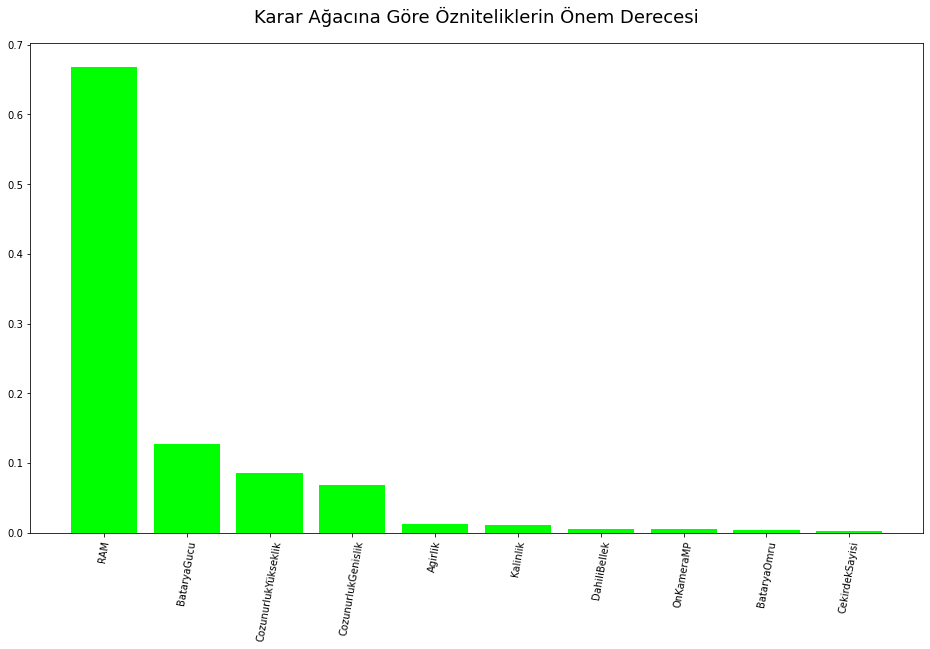

In [72]:
ranking = cart_cv.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize= (16,9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)),ranking[features], color = "lime",align ="center")
plt.xticks(range(len(features)),columns[features],rotation= 80)
plt.show()

## KNN Modeli

In [73]:
knn_params = {"n_neighbors": np.arange(2,50)}

* En yakın komşu sayısını 2 ile 50 arasında hepsini deneyecek

In [75]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params,cv =3)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [76]:
# en iyi skor ve en iyi parametreler

print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.9247044453169305
En iyi parametreler: {'n_neighbors': 13}


In [77]:
#modeli en iyi parametre ile eğitelim
knn = KNeighborsClassifier(13)
knn_tuned = knn.fit(X_train,y_train)

In [78]:
y_pred = knn_tuned.predict(X_test)

In [79]:
# Doğruluk skoru
accuracy_score(y_test,y_pred)

0.92

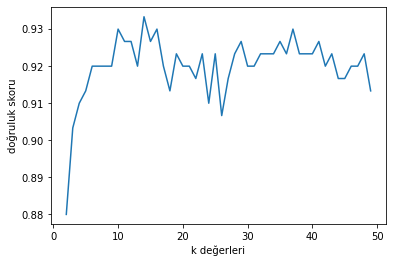

In [80]:
#modelin k değerini nasıl sectiğini görüntüleyeceğim
score_list = []

for i in range(2,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
    
plt.plot(range(2,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("doğruluk skoru")
plt.show()

In [81]:
cross_val_score(knn_tuned,X_test,y_test,cv= 10)

array([0.86666667, 0.86666667, 0.93333333, 0.83333333, 0.93333333,
       0.83333333, 0.86666667, 0.96666667, 0.83333333, 0.93333333])

In [82]:
cross_val_score(knn_tuned,X_test,y_test,cv= 10).mean()

0.8866666666666665

In [83]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[63,  4,  4,  0],
       [ 3, 68,  0,  0],
       [ 5,  0, 62,  4],
       [ 0,  0,  4, 83]], dtype=int64)

**En iyi sonuç veren algoritma KNN algoritması oldu**